# ¿Qué es PCA?

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

x = 3*np.random.rand(200)
y = 20*x + 2*np.random.randn(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

print(x)
print(y)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

## hstack: Nos permite pasar nuestro dos vectores y unirlos en uno solo

In [7]:
xy = np.hstack([x, y])
print(xy.shape)

(200, 2)


## Grafica de dispersion
Tenemos un conjunto de datos altamente correlacionados.
Que implica esto sobre las dimensiones? 

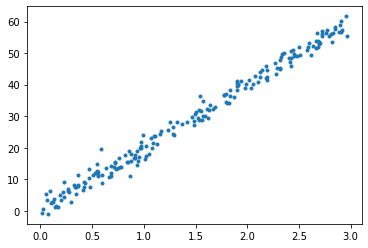

In [8]:
plt.plot(xy[:,0], xy[:,1], '.')
plt.show()

### Buena practica: Centrar la informacion es una buena practica para simplificar el computo de los numeros.

In [13]:
xy_centrado = xy - np.mean(xy, axis = 0)

## Graficamos nuestros datos centrados en la media.

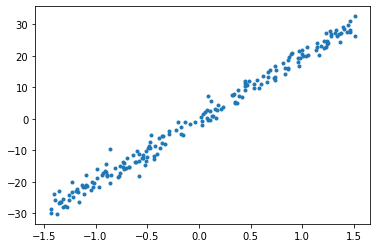

In [14]:
plt.plot(xy_centrado[:,0], xy_centrado[:,1], '.')
plt.show()

El siguiente paso es calcular nuestra matriz de covarianza y calcular sus autovectores y autovalores. 

La matriz de covarianza se resuelve así xy_centrado.T.dot(xy_centrado) 

Falta dividirla por la cantidad de datos para obtener el promedio pero es un escalar y no nos afecta para obtener nuestros autovectores y autovalores, ya que obentemos un múltiplo del autovector, pero su dirección sigue siendo la misma.

In [16]:
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
print(autovectores)

[[-0.9987754  -0.04947417]
 [ 0.04947417 -0.9987754 ]]


In [18]:
%run "../funciones_auxiliares/graficarVectores.ipynb"

## Graficamos nuestros autovectores.
Queremos ver como estos autovectores estan relacionados con la direccion en la cual se mueve nuestra informacion.

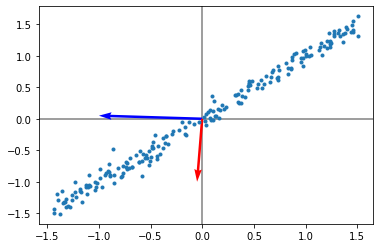

In [21]:
graficarVectores(autovectores.T, ['blue', 'red'])

plt.plot(xy_centrado[:, 0], xy_centrado[:, 1]/20, '.')

plt.show()

Comprobaremos si el autovector que creemos que tiene la mayor cantidad de informacion es el que pensamos (color rojo)

**Respuesta**: El numero mas grande 6.28759594e+04 es el que corresponde al color rojo y  es el que nos va a permitir quedarnos la mayor cantidad de informacion.

In [23]:
print(autovalores)

[1.85050946e+00 6.28759594e+04]


Luego de elegir debemos proyectar los datos perpendicularmente en el autovector, para esto podemos usar el producto punto.

Lo que hace el profesor acá es proyectar los datos con cada autovector.

In [24]:
xy_nuevo = autovectores.T.dot(xy_centrado.T)

## Graficando nuestro autovector seleccionado
Podemos apreciar como nuestra nube de datos cambio de algo que estaba linealmente relacionada.
Ahora estamos en el escenario ideal donde todos nuestros puntos se mudaron a lo largo del espacio y podemos distinguir con que variable quedarnos, por ejemplo; que darnos con la variable Y

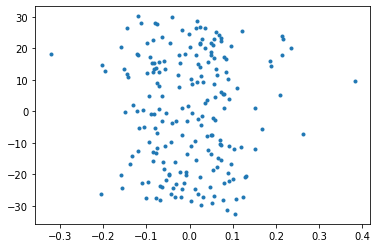

In [25]:
plt.plot(xy_nuevo[0, :], xy_nuevo[1, :], '.')

plt.show()